# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Проверка уникальных значений столбца debt

In [22]:
data['debt'].unique()

array([0, 1])

Подсчёт среднего значения вероятности невозврата кредита от количества детей

In [23]:
data.groupby('children')['debt'].agg(['count','mean'])

,count,mean
children,,
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


График

<AxesSubplot:xlabel='children'>

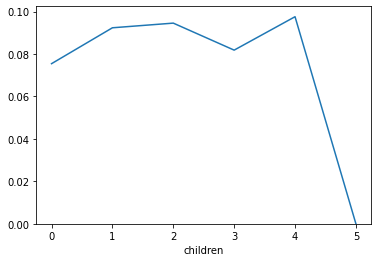

In [24]:
data.groupby('children')['debt'].mean().plot(ylim=0)

Количество клиентов с 4 и 5 детьми недостаточно для репрезентативной выборки. Имеет смысл объединить их в одну категорию с теми, у кого 3 ребенка:

In [25]:
def categored_children(children):
    if children < 3:
        return str(children)
    else:
        return '3 и больше'

In [26]:
data['children_cat'] = data['children'].apply(categored_children)

In [27]:
data.groupby('children_cat')['debt'].agg(['count','mean'])

,count,mean
children_cat,,
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3 и больше,380,0.081579


<AxesSubplot:xlabel='Количество детей'>

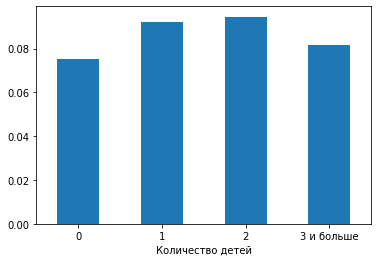

In [28]:
data.groupby('children_cat')['debt'].mean().plot(kind='bar',xlabel='Количество детей', rot=0)

Возьмем за 100% минимальное среднее значение среди категорий:

In [29]:
data_normal = data.groupby('children_cat')['debt'].agg(['count','mean'])
data_normal['norm'] = data_normal['mean']/data_normal['mean'].min()*100
data_normal['norm']

children_cat
0             100.000000
1             122.412865
2             125.323618
3 и больше    108.140070
Name: norm, dtype: float64

<AxesSubplot:xlabel='Количество детей'>

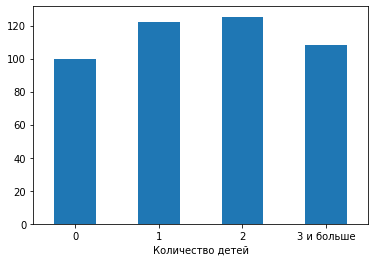

In [30]:
data_normal['norm'].plot(kind='bar',xlabel='Количество детей', rot=0)

**Выводы:** 
1. Зависимость между количеством детей и возвратом кредита в срок существует.
2. Самая "безопасная" категория заёмщиков - без детей. 
2. Заёмщики с одним ребенком не возвращают в срок кредит на 22.4% чаще, с двумя - на 25,3%
3. Заёмщики с 3 и более детьми уже более ответственны - превыщение максимума всего на 8.1%

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Проверка уникальных значений столбца family_status:


In [31]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Подсчёт среднего значения вероятности невозврата кредита от семейного положения заёмщика:

In [32]:
data.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
Не женат / не замужем,2796,0.097639
в разводе,1189,0.070648
вдовец / вдова,951,0.066246
гражданский брак,4134,0.093130
женат / замужем,12261,0.075606


<AxesSubplot:xlabel='Семейное положение'>

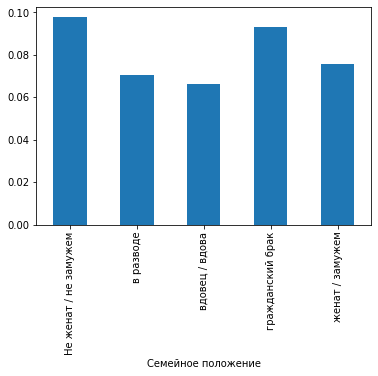

In [33]:
data.groupby('family_status')['debt'].mean().plot(kind='bar',xlabel='Семейное положение', rot=90)

Выборка вполне репрезентативная. Нормализуем ее:

In [34]:
data_normal = data.groupby('family_status')['debt'].agg(['count','mean'])
data_normal['norm'] = data_normal['mean']/data_normal['mean'].min()*100
data_normal['norm']

family_status
Не женат / не замужем    147.389127
в разводе                106.644239
вдовец / вдова           100.000000
гражданский брак         140.582164
женат / замужем          114.128421
Name: norm, dtype: float64

<AxesSubplot:xlabel='Семейное положение'>

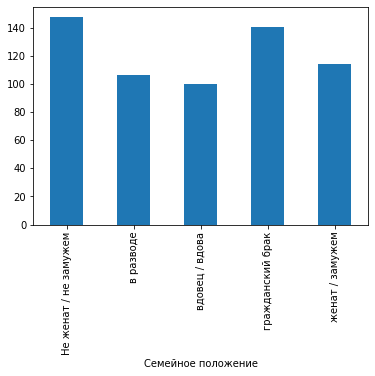

In [35]:
data_normal['norm'].plot(kind='bar',xlabel='Семейное положение', rot=90)

Попробуем категоризировать данные:

In [36]:
def categored_family(family):
    if family in ['Не женат / не замужем', 'гражданский брак']:
        return 'Не был(а) женат/замужем'
    if family in ['в разводе', 'вдовец / вдова']:
        return 'Был(а) женат/замужем'
    else:
        return 'Сейчас женат/замужем'

In [37]:
data['family_cat'] = data['family_status'].apply(categored_family)
data.groupby('family_cat')['debt'].agg(['count','mean'])

,count,mean
family_cat,,
Был(а) женат/замужем,2140,0.068692
Не был(а) женат/замужем,6930,0.094949
Сейчас женат/замужем,12261,0.075606


Нормализуем по минимальному значению:

In [38]:
data_normal = data.groupby('family_cat')['debt'].agg(['count','mean'])
data_normal['norm'] = data_normal['mean']/data_normal['mean'].min()*100
data_normal['norm']

family_cat
Был(а) женат/замужем       100.000000
Не был(а) женат/замужем    138.225795
Сейчас женат/замужем       110.065264
Name: norm, dtype: float64

<AxesSubplot:xlabel='Семейное положение'>

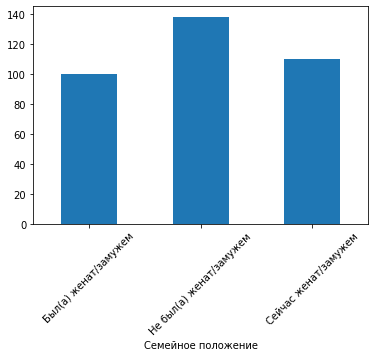

In [39]:
data_normal['norm'].plot(kind='bar',xlabel='Семейное положение', rot=45)

**Выводы:** 
1. Зависимость между семейным положением и возвратом кредита в срок существует
2. Наиболее часто не возвращают вовремя кредит люди, никогда не бывшие в официальном браке. Причём гражданский брак повышает надежность этой категории всего на несколько процентов.
3. Лица, находящиеся в официальном браке, значительно надежнее - приблизительно на 25%. Видимо, брак прививает ответственность.
4. Наиболее надежные заёмщики - те кто брак "пережил". А самые-самые надежные из них - те, кто пережил и своего партнера.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

В задании 16 была проведена категоризация доходов:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Подсчёт среднего значения вероятности невозврата кредита от дохода заёмщика:

In [40]:
data.groupby('total_income_category')['debt'].agg(['count','mean'])

,count,mean
total_income_category,,
A,25,0.080000
B,5014,0.070602
C,15921,0.084982
D,349,0.060172
E,22,0.090909


Категории A и Е не репрентативны. Имеет смысл сгруппировать их с соседними категориями

In [41]:
def categored_income(income):
    if income in ['A', 'B']:
        return 'До 50 тыс.'
    if income in ['D', 'E']:
        return 'Свыше 200 тыс.'
    else:
        return 'От 50 до 200 тыс.'

In [42]:
data['income_cat'] = data['total_income_category'].apply(categored_income)
data.groupby('income_cat')['debt'].agg(['count','mean'])

,count,mean
income_cat,,
До 50 тыс.,5039,0.070649
От 50 до 200 тыс.,15921,0.084982
Свыше 200 тыс.,371,0.061995


Нормализуем и отобразим на графике

In [43]:
data_normal = data.groupby('income_cat')['debt'].agg(['count','mean'])
data_normal['norm'] = data_normal['mean']/data_normal['mean'].min()*100
data_normal['norm']

income_cat
До 50 тыс.           113.959809
От 50 до 200 тыс.    137.079821
Свыше 200 тыс.       100.000000
Name: norm, dtype: float64

<AxesSubplot:xlabel='Доход'>

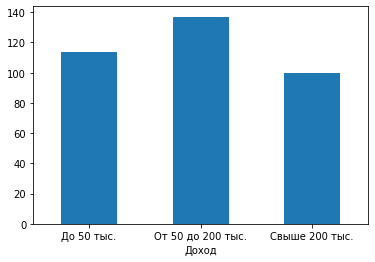

In [44]:
data_normal['norm'].plot(kind='bar',xlabel='Доход', rot=0)

Возможно, надежность заёмщиков растет с их доходами.
Попробуем по-другому категоризировать данные, разбив на более равномерные группы

In [45]:
data['income_cut']=pd.qcut(data['total_income'],25)

In [46]:
data.groupby('income_cut')['debt'].agg(['count','mean'])

,count,mean
income_cut,,
"(20666.999, 61239.2]",854,0.059719
"(61239.2, 73243.2]",853,0.079719
"(73243.2, 82849.2]",853,0.091442
"(82849.2, 90814.2]",853,0.085580
"(90814.2, 98514.0]",854,0.086651
"(98514.0, 105617.6]",853,0.070340
"(105617.6, 112556.4]",853,0.087925
"(112556.4, 118514.0]",1088,0.090993
"(118514.0, 124655.6]",618,0.095469


<AxesSubplot:xlabel='Доход'>

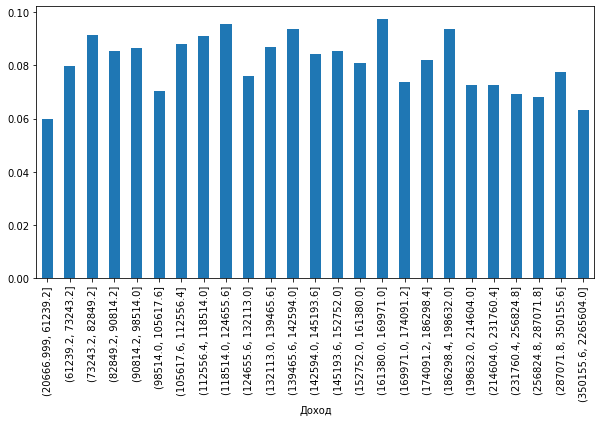

In [47]:
data.groupby('income_cut')['debt'].mean().plot(kind='bar',xlabel='Доход',rot=90, figsize=[10, 5])

Нормализуем данные в зависимости от минимального значения:

In [48]:
data_normal = data.groupby('income_cut')['debt'].agg(['count','mean'])
data_normal['norm'] = data_normal['mean']/data_normal['mean'].min()*100
data_normal

,count,mean,norm
income_cut,,,
"(20666.999, 61239.2]",854,0.059719,100.000000
"(61239.2, 73243.2]",853,0.079719,133.489644
"(73243.2, 82849.2]",853,0.091442,153.120474
"(82849.2, 90814.2]",853,0.085580,143.305059
"(90814.2, 98514.0]",854,0.086651,145.098039
"(98514.0, 105617.6]",853,0.070340,117.784980
"(105617.6, 112556.4]",853,0.087925,147.231225
"(112556.4, 118514.0]",1088,0.090993,152.368080
"(118514.0, 124655.6]",618,0.095469,159.864205


<AxesSubplot:xlabel='Доход'>

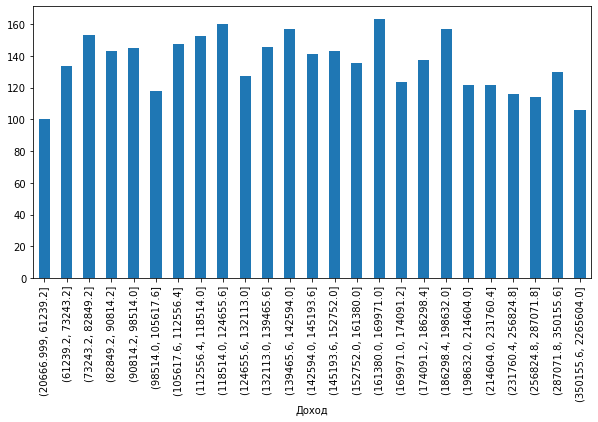

In [49]:
data_normal['norm'].plot(kind='bar',xlabel='Доход', rot=90, figsize=[10, 5])

Вывод: разбитие на категории в задании 16 неудачно. Для наглядности на основании графиков разобъем данные на другие категории:

In [50]:
def new_categorize_income(income):
    try:
        if 0 <= income <= 50000:
            return 'до 050 тыс.'
        elif 50001 <= income <= 75000:
            return 'от 050 до 075 тыс.'
        elif 75001 <= income <= 95000:
            return 'от 075 до 95 тыс.'
        elif 95001 <= income <= 105000:
            return 'от 095 до 105 тыс.'
        elif 105001 <= income <= 125000:
            return 'от 105 до 125 тыс.'
        elif 125001 <= income <= 130000:
            return 'от 125 до 130 тыс.'
        elif 130001 <= income <= 175000:
            return 'от 130 до 175 тыс.'
        elif 174001 <= income <= 300000:
            return 'от 175 до 300 тыс.'
        elif 300001 <= income <= 400000:
            return 'от 300 до 400 тыс.'
#        elif 400001 <= income <= 500000:
#            return 'от 400 до 500 тыс.'
        elif income >= 400001:
            return 'свыше 400 тыс.'
    except:
        pass

In [51]:
data['new_income_category'] = data['total_income'].apply(new_categorize_income)
data_income = data.groupby('new_income_category')['debt'].agg(['count','mean'])
data_income

,count,mean
new_income_category,,
до 050 тыс.,371,0.061995
от 050 до 075 тыс.,1483,0.076197
от 075 до 95 тыс.,2020,0.087129
от 095 до 105 тыс.,1179,0.072943
от 105 до 125 тыс.,2663,0.091626
от 125 до 130 тыс.,569,0.066784
от 130 до 175 тыс.,6303,0.086784
от 175 до 300 тыс.,5269,0.075726
от 300 до 400 тыс.,946,0.079281


<AxesSubplot:xlabel='Доход'>

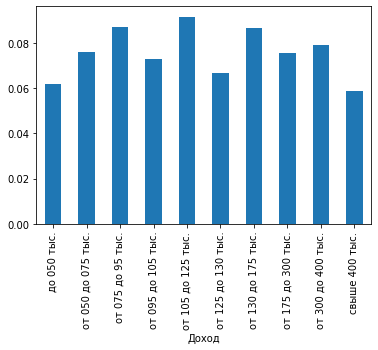

In [52]:
data_income['mean'].plot(kind='bar',xlabel='Доход', rot=90)

Нормализуем результат по минимальному значению

In [53]:
data_income['norm'] = data_income['mean']/data_income['mean'].min()*100
data_income

,count,mean,norm
new_income_category,,,
до 050 тыс.,371,0.061995,105.590818
от 050 до 075 тыс.,1483,0.076197,129.780523
от 075 до 95 тыс.,2020,0.087129,148.399872
от 095 до 105 тыс.,1179,0.072943,124.238693
от 105 до 125 тыс.,2663,0.091626,156.059743
от 125 до 130 тыс.,569,0.066784,113.747945
от 130 до 175 тыс.,6303,0.086784,147.812869
от 175 до 300 тыс.,5269,0.075726,128.978382
от 300 до 400 тыс.,946,0.079281,135.033758


<AxesSubplot:xlabel='Доход'>

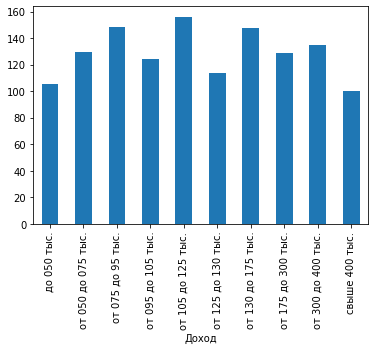

In [54]:
data_income['norm'].plot(kind='bar',xlabel='Доход', rot=90)

**Выводы:** 
1. Зависимость между уровнем дохода и возвратом кредита в срок существует, но она скорее дискретна: на разных диапазонах разные значения надежности, соседние диапазоны не имеют плавных переходов. В очень грубом приближении можно говорить о том, что пик невозвращаемых кредитов приходится на заёмщиков, имеющих доходы от 75000 до 400000 рублей.
2. Наиболее ответственные заёмщики имеют доход до 50000 рублей и свыше 400000
3. Наиболее ненадежные заёмщики имеют доход от 75000 до 200000 рублей и от 300000 до 400000 рублей
4. Заемщики в "узких" диапазонах доходов:от 95000 до 105000 и от 125000 до 130000 рублей также имеют высокую надежность. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Рассмотрим данные по группам категорий

In [55]:
data['purpose_category'].unique()

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

Подсчёт среднего значения вероятности невозврата кредита от цели кредита:

In [56]:
data.groupby('purpose_category')['debt'].agg(['count','mean'])

,count,mean
purpose_category,,
операции с автомобилем,4279,0.093480
операции с недвижимостью,10751,0.072551
получение образования,3988,0.092528
проведение свадьбы,2313,0.079118


In [60]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_cat,family_cat,income_cat,income_cut,new_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,1,Сейчас женат/замужем,До 50 тыс.,"(231760.4, 256824.8]",от 175 до 300 тыс.
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,1,Сейчас женат/замужем,От 50 до 200 тыс.,"(105617.6, 112556.4]",от 105 до 125 тыс.
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,0,Сейчас женат/замужем,От 50 до 200 тыс.,"(145193.6, 152752.0]",от 130 до 175 тыс.
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,3 и больше,Сейчас женат/замужем,До 50 тыс.,"(256824.8, 287071.8]",от 175 до 300 тыс.
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,0,Не был(а) женат/замужем,От 50 до 200 тыс.,"(152752.0, 161380.0]",от 130 до 175 тыс.


In [77]:
pd.pivot_table(data,index='purpose_category',values='debt',aggfunc=['count','mean'])

,count,mean
,debt,debt
purpose_category,,
операции с автомобилем,4279,0.093480
операции с недвижимостью,10751,0.072551
получение образования,3988,0.092528
проведение свадьбы,2313,0.079118


In [78]:
pd.pivot_table(data,index='purpose_category',values='debt',aggfunc=['count','mean']).columns

MultiIndex([('count', 'debt'),
            ( 'mean', 'debt')],
           )

In [83]:
pd.pivot_table(data,index='purpose_category',values='debt',aggfunc=['count','mean']).sort_values(([( 'mean', 'debt')]))

,count,mean
,debt,debt
purpose_category,,
операции с недвижимостью,10751,0.072551
проведение свадьбы,2313,0.079118
получение образования,3988,0.092528
операции с автомобилем,4279,0.093480


<AxesSubplot:xlabel='Цели кредита (категории)'>

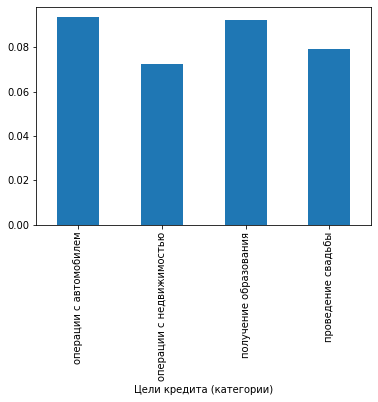

In [57]:
data.groupby('purpose_category')['debt'].mean().plot(kind='bar',xlabel='Цели кредита (категории)', rot=90)

Нормализуем:

In [58]:
data_normal = data.groupby('purpose_category')['debt'].agg(['count','mean'])
data_normal['norm'] = data_normal['mean']/data_normal['mean'].min()*100
data_normal['norm']

purpose_category
операции с автомобилем      128.846304
операции с недвижимостью    100.000000
получение образования       127.533852
проведение свадьбы          109.051016
Name: norm, dtype: float64

<AxesSubplot:xlabel='Цели кредита (категории)'>

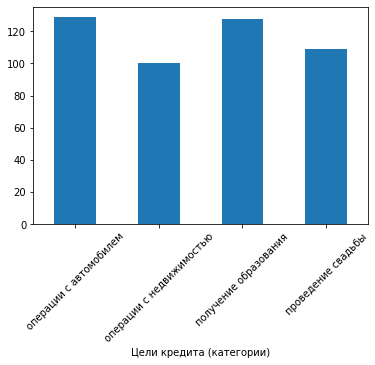

In [59]:
data_normal['norm'].plot(kind='bar',xlabel='Цели кредита (категории)', rot=45)

В связи с хаотическими названиями целей кредита, входящих в категории, более глубокий анализ данных внутри категорий бессмысленен.

**Вывод:** Заёмщики, берущие кредит на операции с недвижимостью - наиболее надежны. Чуть менее надежны  - берущие кредит на свадьбу.
Вероятность нарушения срока возврата кредита наиболее высока при операциях с автомобилями и получением образования (риск больше чем на 30%). 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Человеческий фактор или технический сбой. В первом случае это опечатки, ошибки, невведенные данные, неточные данные, дублирование. Во втором: разрушение или несохранение данных и тоже - дублирование.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медиана более устойчива в случае, если в выборке присутствуют аномальные данные.

### Шаг 4: общий вывод.

**Данные, влияющие на надежность заёмщика:**

**1. Наличие детей:** Наиболее надежные заёмщики не имеют детей, следующие по надежности многодетные родители (имеющие 3 и более детей). Наиболее "опасны" заёмщики с 1 или 2 детьми

**2. Семейное положение:**
Наиболее надежны заёмщики - вдовцы/вдовы,а также - находящиеся в разводе. Чуть менее надежны заёмщики в браке. Те кто не разу не был в официальном браке, не возвращают кредит значительно чаще.

**3. Уровень доходов:** Наиболее надежны заёмщики, имеющие доход до 50 и свыше 400000 рублей,а также в "узких" диапазонах доходов:от 95000 до 105000 и от 125000 до 130000 рублей. Наиболее ненадежные заёмщики имеют доход от 75000 до 200000 рублей и от 300000 до 400000 рублей (за исключением вышеуказанных "узких" значений)



**4. Цели кредита:** Наиболее надежные заёмщики, берущие кредит на операции с недвижимостью. На втором месте - на проведение свадьбы. Вероятность нарушения срока возврата кредита наиболее высока у заёмщиков, берущих кредиты на операции с автомобилями и получением образования. 